# Pregunta 1.1

In [2]:
from keras.datasets import mnist
import numpy as np

def f(nval=1000):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_val = x_train[-nval:]
    y_val = y_train[-nval:]
    x_train = x_train[:-nval]
    y_train = y_train[:-nval]
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_val = np_utils.to_categorical(y_val, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    return (x_train, Y_train, y_train), (x_test, Y_test, y_test), (x_val, Y_val, y_val)

## a) Entrenamiento de autoencoders con sigmoid y relu

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import SGD

# Obtener conjuntos de datos

train, test, val = f()
x_train, Y_train, y_train = train
x_test, Y_test, y_test = test
x_val, Y_val, y_val = val

In [ ]:
# Iterar sobre nuevas dimensionalidades
d_prime = [2, 8, 32, 64]

for d in d_prime:
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('1_1/basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    encoder.save('1_1/basic_encoder_sigmoid_768x'+str(d)+'.h5')
    deccoder.save('1_1/basic_decoder_sigmoid_768x'+str(d)+'.h5')

In [19]:
from keras.models import load_model

d_prime = [2, 8, 32, 64]
print "Autoencoder Sigmoid"
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_sigmoid_768x'+str(d)+'.h5')
    compression = float(x_test.shape[1]) / float(encoder.predict(x_test).shape[1])
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,". Loss:", loss

print "\nAutoencoder Relu-Sigmoid"
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_relusig_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_relusig_768x'+str(d)+'.h5')
    compression = float(x_test.shape[1]) / float(encoder.predict(x_test).shape[1])
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,". Loss:", loss
    
print "\nAutoencoder Sigmoid-Relu"
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_sigrelu_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_sigrelu_768x'+str(d)+'.h5')
    compression = float(x_test.shape[1]) / float(encoder.predict(x_test).shape[1])
    loss = autoencoder.evaluate(x_test, x_test, batch_size=10, verbose=0)
    print "Compresion:",compression,". Loss:", loss

Autoencoder Sigmoid
Compresion: 392.0 . Loss: 0.263085764617
Compresion: 98.0 . Loss: 0.24877118811
Compresion: 24.5 . Loss: 0.181664203152
Compresion: 12.25 . Loss: 0.128116836525

Autoencoder Relu-Sigmoid
Compresion: 392.0 . Loss: 0.227548194692
Compresion: 98.0 . Loss: 0.165377822697
Compresion: 24.5 . Loss: 0.0919227588177
Compresion: 12.25 . Loss: 0.0732410996519

Autoencoder Sigmoid-Relu
Compresion: 392.0 . Loss: 1.6905777148
Compresion: 98.0 . Loss: 4.65654008555
Compresion: 24.5 . Loss: 6.22776897001
Compresion: 12.25 . Loss: 6.23862516403


## b) Comparación de reconstrucciones

El autoencoder sigmoid funciona bien, con poca pérdida, y muestra un aprendizaje efectivo. En este caso el autoencoder Relu-sigmoid mejora sustancialmente las predicciones que se pueden lograr. Para las dimensiones probadas, las pérdidas fueron estrictamente menores, lo que se observa cualitativamente en las reconstrucciones realizadas.

Poner activaciones Relu en la decodificacion generó demasiados errores durante el entrenamiento. Probablemente la regla relu es demasiado fuerte y provoca pérdida de información durante la decodificación, pues no deja espacio para generalización a partir de una representación codificada.

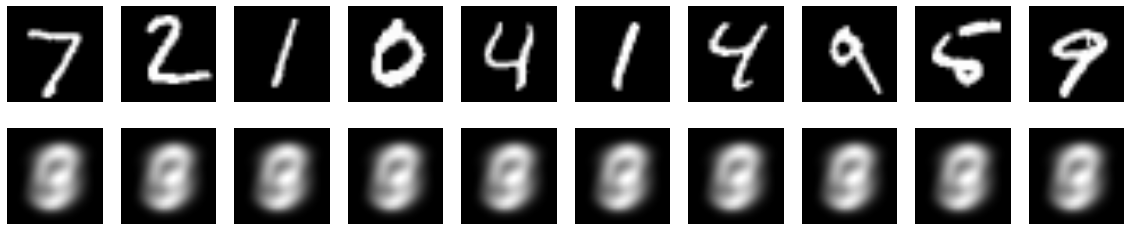

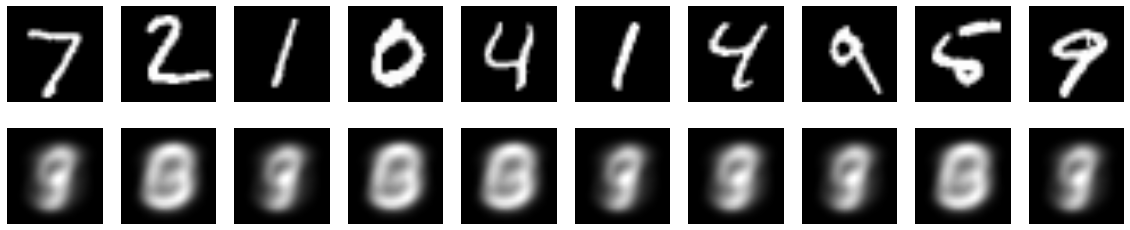

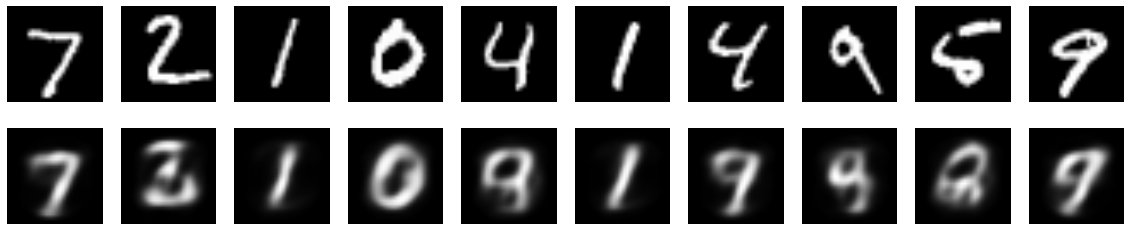

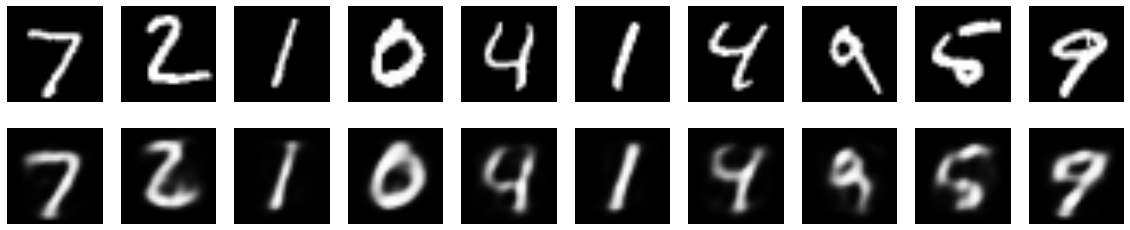

In [22]:
%matplotlib inline
d_prime = [2, 8, 32, 64]
from keras.models import load_model
import matplotlib.pyplot as plt

for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_sigmoid_768x'+str(d)+'.h5')
    decoder = load_model('1_1/basic_decoder_sigmoid_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

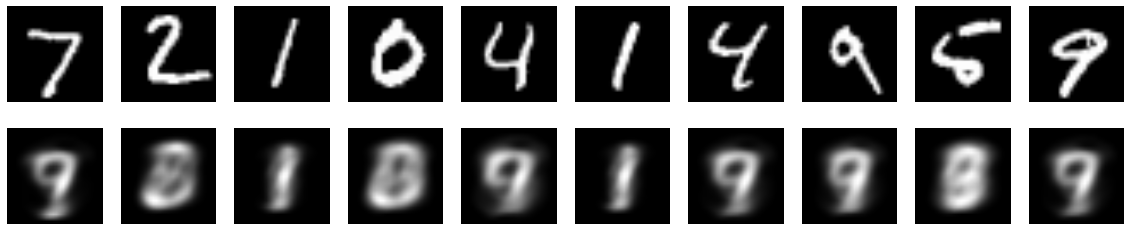

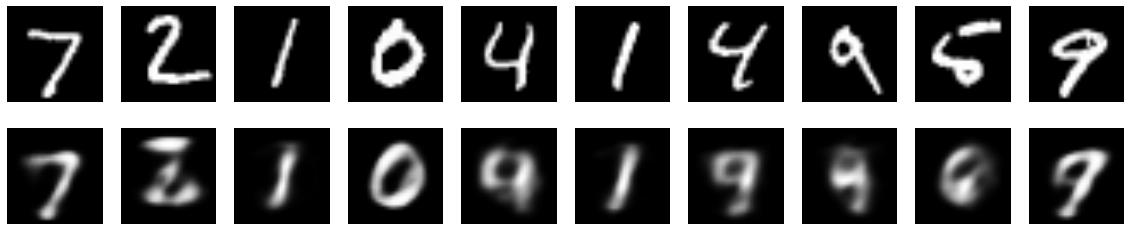

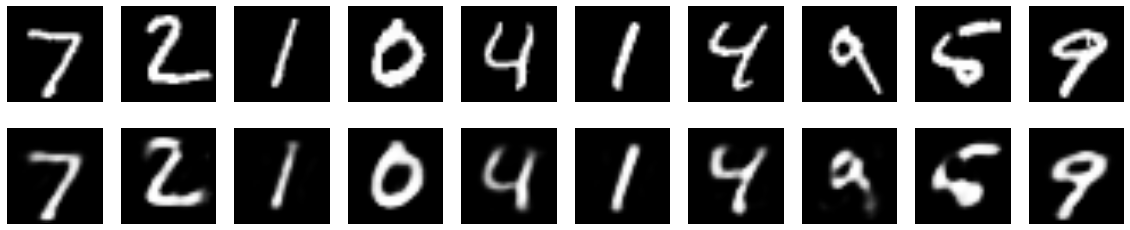

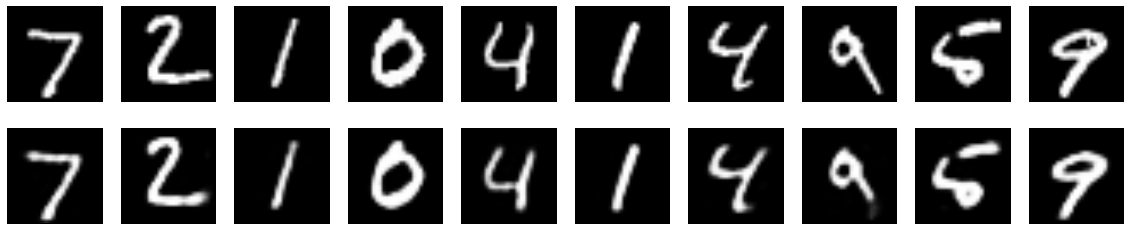

In [24]:
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_relusig_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_relusig_768x'+str(d)+'.h5')
    decoder = load_model('1_1/basic_decoder_relusig_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

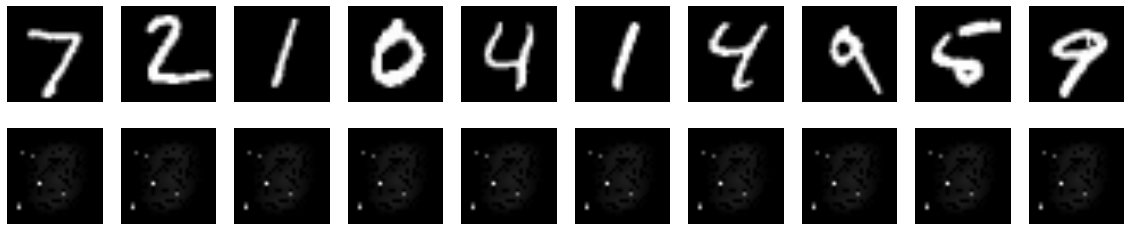

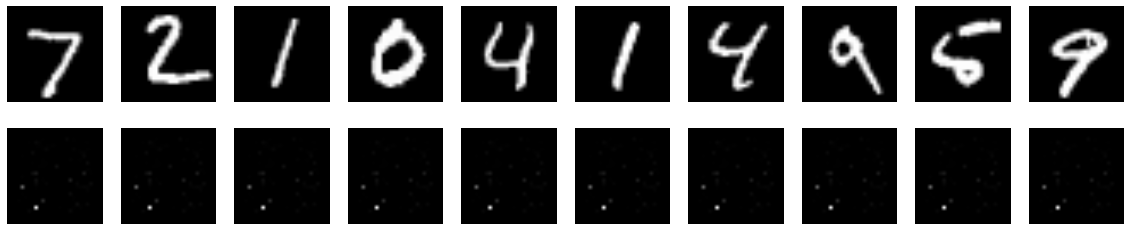

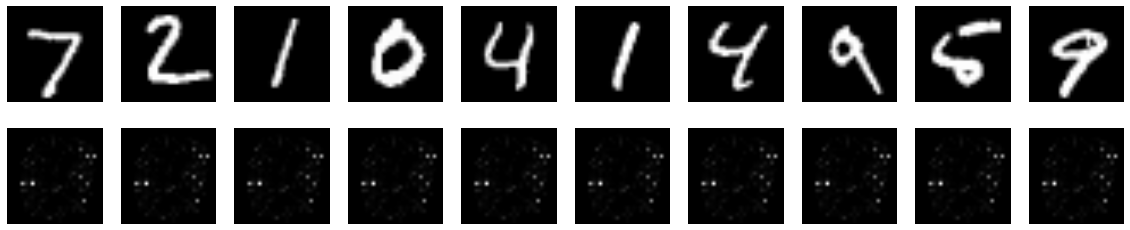

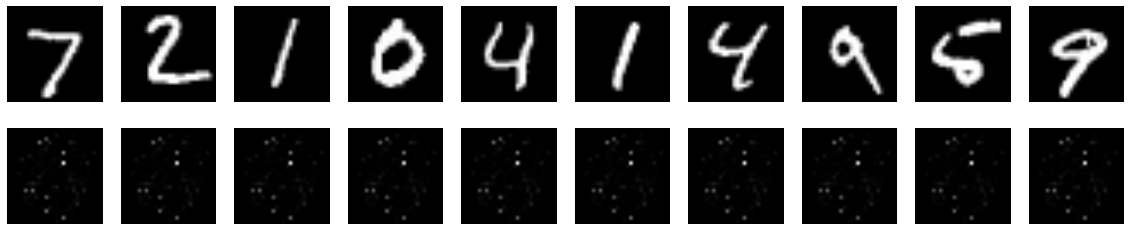

In [28]:
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_sigrelu_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_sigrelu_768x'+str(d)+'.h5')
    decoder = load_model('1_1/basic_decoder_sigrelu_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## c) Verificar la calidad de la representación mediante el clasificador kNN (k Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from keras.models import load_model
from timeit import default_timer as timer


print "Resultado en data original"
clf = KNeighborsClassifier(10)
print "Fitting..."
clf.fit(x_train, y_train)
start = timer()
print "Score..."
score = clf.score(x_test, y_test)
end = timer()
print 'Classification Accuracy %.2f' % score
print "Time: ", (end - start)


print "Resultados con AE Sigmoid"
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_sigmoid_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_sigmoid_768x'+str(d)+'.h5')
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    clf = KNeighborsClassifier(10)
    print "Fitting..."
    clf.fit(encoded_train, y_train)
    start = timer()
    print "Score..."
    score = clf.score(encoded_test, y_test)
    end = timer()
    print 'Classification Accuracy %.2f' % score
    print "Time: ", (end - start)


print "Resultados con AE ReLu-Sigmoid"
for d in d_prime:
    autoencoder = load_model('1_1/basic_autoencoder_relusig_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_relusig_768x'+str(d)+'.h5')
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    clf = KNeighborsClassifier(10)
    print "Fitting..."
    clf.fit(encoded_train, y_train)
    start = timer()
    print "Score..."
    score = clf.score(encoded_test, y_test)
    end = timer()
    print 'Classification Accuracy %.2f' % score
    print "Time: ", (end - start)

Debido a la relativamente alta dimensionalidad del input original, kNN sobre la data sin reducción de dimensionalidad demora un gran tiempo de procesamiento. Para facilidad de ejecución el output se recoje separado de la ejecución debido al gran uso de memoria.

Resultados con AE Sigmoid

| Compression | Classification Accuracy| Time (s)|
| :-------------: |:-------------:| :-----:|
| None   | 0.97      | 930.273627043 |
| 2    | 0.14      | 1.88785815239 |
| 8    | 0.31      | 0.177634954453 |
| 32   | 0.88      | 5.65793991089 |
| 64   | 0.96      |  139.581683874 |

Un buen balance entre precisión y tiempo de ejecución se logra con una compresión d = 32, precisión de 0.88 en 5 segundos. A medida que la dimensionalidad aumenta, también nos encontramos con mayores tiempos de ejecución, con d = 64 la precisión es alta pero se logró en ~2 minutos.

Resultados con AE Relu-Sigmoid

| Compression | Classification Accuracy| Time (s)|
| :-------------: |:-------------:| :-----:|
| None   | 0.97      | 930.273627043 |
| 2    | 0.41      |0.0913219451904 |
| 8    | 0.89     | 2.09888792038 |
| 32   | 0.96    | 63.7726609707 |
| 64   | 0.96      |  156.898802996 |

La precisión lograda con esta arquitectura para d = 2 es mejor que y más rápida que la arquitectura anterior.

Ahora bien, para una precisión de 0.89 esta arquitectura demora aproximadamente 2 segundos, por lo que esta arquitectura con mayor compresión logra el mismo rendimiento que la arquitectura anterior con menor compresión.

Con d = 64 no se aprecian cambios en la precisión y en los tiempos de ejecución, con una diferencia de medio minuto, cualitativamente impreceptible.

## d) Medir calidad del agrupamiento usando métricas ARI y función de desempeño

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

def clustering_accuracy(pred_labels,y,nclusters=10):
    true_pred = 0.0
    for i in range(0,nclusters):
        mvlabel = np.argmax(np.bincount(y[pred_labels==i]))
        true_pred += sum(y[pred_labels==i] == mvlabel)
    return true_pred/len(y)

from sklearn.cluster import KMeans
from sklearn import metrics

# Metricas para data original
model = KMeans(n_clusters=10)
labels_pred = model.fit_predict(x_train)
score = metrics.adjusted_rand_score(y_train, labels_pred)
print 'Clustering ARI %.2f' % score
print 'Clustering ACC %.2f' % clustering_accuracy(labels_pred,y_train)

# Analogo para sigmoid, basta cambiar el autoencoder usado.
for d in d_prime:
    print "dim:",str(d)
    autoencoder = load_model('1_1/basic_autoencoder_relusig_768x'+str(d)+'.h5')
    encoder = load_model('1_1/basic_encoder_relusig_768x'+str(d)+'.h5')
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)

    model = KMeans(n_clusters=10)
    labels_pred = model.fit_predict(encoded_train)
    score = metrics.adjusted_rand_score(y_train, labels_pred)
    print 'Clustering ARI %.2f' % score
    print 'Clustering ACC %.2f' % clustering_accuracy(labels_pred,y_train)

Resultados agrupamiento de AE Sigmoid

| Compression | ARI | ACC |
| :-------------: |:-------------:| :-----:|
| None | 0.36 | 0.59 |
| 2   | 0.00      | 0.12 |
| 8    | 0.11      | 0.26 |
| 32    | 0.37     | 0.59 |
| 64   | 0.37    | 0.59 |


Resultados agrupamiento de AE ReLu-Sigmoid

| Compression | ARI | ACC |
| :-------------: |:-------------:| :-----:|
| None | 0.36 | 0.59 |
| 2   | 0.17      | 0.36 |
| 8    | 0.30      | 0.52 |
| 32    | 0.23     | 0.49 |
| 64   | 0.22    | 0.41 |

Si se revisa la métrica ARI, en general los valores son bastante bajos, lo que indica que los clusters poseen una baja similaridad, dicho de otro modo, el agrupamiento logrado respecto a las etiquetas originales es bajo.

Cuando revisamos la métrica ACC observamos en general valores más altos a medida que disminuimos la compresión (es decir que permitimos más dimensiones en la representación).

## e) Análisis con PCA

A continuación los mismos análisis anteriores se realizarán pero usando PCA en vez de autoencoders.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Calidad de representacion
for d in d_prime:
    print "Calidad representacion PCA d =",d
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    print "Reconstruction error %.2f" % pca.score(x_test)
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    score = clf.score(pca_test,y_test)
    print 'PCA SCORE %.2f' % score

    model = KMeans(n_clusters=10)
    labels_pred = model.fit_predict(pca_train)
    score = metrics.adjusted_rand_score(y_train, labels_pred)
    print 'Clustering ARI %.2f' % score
    print 'Clustering ACC %.2f' % clustering_accuracy(labels_pred, y_train)

Calidad de representación y agrupamiento vía PCA

| Compression | Reconstruction Error (log-likelihood) | Classification Score | ARI | ACC |
| :-------------: |:-------------:|:-------------:| :-----:|
| None | | 0.97 | 0.36 | 0.59 |
| 2   | 14.39 | 0.44 | 0.23      | 0.41 |
| 8  | 154.14 | 0.90 | 0.34 | 0.59 |
| 32  | 409.47 | 0.97 | 0.36 | 0.59 |
| 64  | 579.79 | 0.97 | 0.36 | 0.58 |

Estas métricas muestran que PCA posee un buen rendimiento en cuanto a representar y agrupar los datos, obteniendo resultados iguales o mejores a los autoencoders básicos probados. Notar también que el tiempo invertido en el uso de PCA es mucho menor que cuando se prueban los autoencoders.

Visualización de la data vía PCA

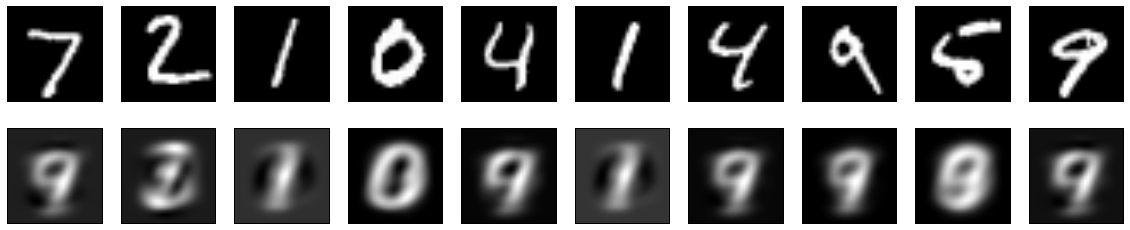

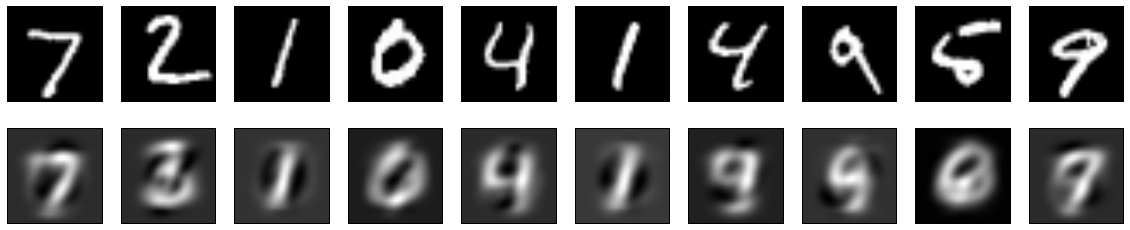

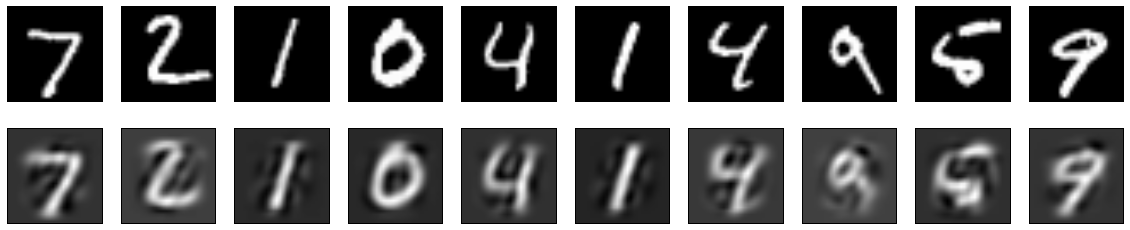

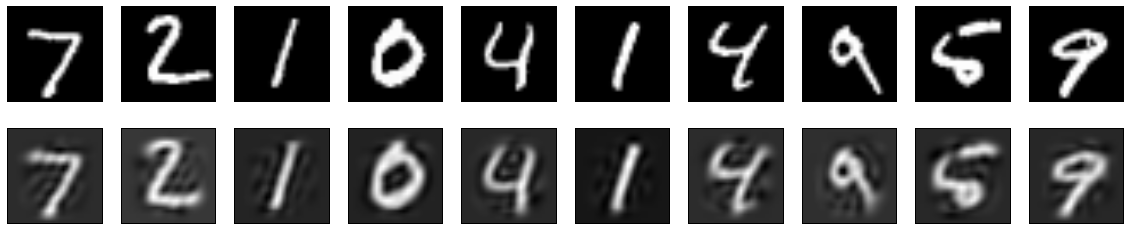

In [9]:
%matplotlib inline
d_prime = [2, 8, 32, 64]
from keras.models import load_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

for d in d_prime:
    pca = PCA(n_components=d)
    pca.fit(x_train)
    encoded_test = pca.transform(x_test)
    decoded_test = pca.inverse_transform(encoded_test)
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

La reconstrucción de los datos vía PCA es apreciable cuando la data se comprime con d=32 y d=64, resultados similares a los obtenidos con los autoencoders anteriores.

## f) Análisis de RBM básica

A continuación mostraremos los mismos análisis esta vez utilizando RBMs

In [ ]:
for d in d_prime:
    model = BernoulliRBM(n_components=d, batch_size=25,
    learning_rate=0.05,verbose=1, n_iter=50) ##n_components is d'
    model.fit(x_train)##Train using persistent Gibbs chains
    fileo = open('1_1/basicRBM_'+str(d)+'.pickle','wb')
    pickle.dump(model,fileo)
    fileo.close()

for d in d_prime:
    print "Calidad representacion RBM d =",d
    rbm = pickle.load(open("1_1/basicRBM_"+str(d)+".pickle", "rb"))
    rbm_train = rbm.transform(x_train)
    rbm_test = rbm.transform(x_test)
    clf = KNeighborsClassifier(10)
    clf.fit(rbm_train, y_train)
    score = clf.score(rbm_test,y_test)
    print 'RBM SCORE %.2f' % score

    model = KMeans(n_clusters=10)
    labels_pred = model.fit_predict(rbm_train)
    score = metrics.adjusted_rand_score(y_train, labels_pred)
    print 'Clustering ARI %.2f' % score
    print 'Clustering ACC %.2f' % clustering_accuracy(labels_pred, y_train)


Calidad de representación y agrupamiento vía RBM

| Compression | Classification Score | ARI | ACC |
| :-------------: |:-------------:|:-------------:| :-----:|
| None | 0.97 | 0.36 | 0.59 |
| 2   | 0.36 | 0.19    | 0.32 |
| 8  | 0.51 | 0.05 | 0.20 |
| 32  | 0.93 | 0.41 | 0.63 |
| 64  | 0.95 | 0.45 | 0.65 |

Observamos valores bastante aceptables de clasificación y similares a los arrojados por PCA. Nuevamente en cuanto a clasificación y métricas ARI y ACC, 32 dimensiones parece ser aceptable.

## g) Modificación de AE para convertirlo en Deep AE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

## Modificacion de AE en Deep AE
new_d_prime = [2, 4, 8, 16, 32]

## Caso L = 2
for d in new_d_prime:
    target_dim = d #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(target_dim, activation='relu')(encoded1)
    decoded2 = Dense(1000, activation='relu')(encoded2)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded1)
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(x_train,x_train,nb_epoch=25,batch_size=25,shuffle=True, validation_data=(x_val, x_val))
    autoencoder.save('my_autoencoder_784x1000x'+str(d)+'.h5')
    pca = PCA(n_components=target_dim)
    pca.fit(x_train)

## Caso L = 3
for d in new_d_prime:
    target_dim = d #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(target_dim, activation='relu')(encoded2)
    decoded3 = Dense(500, activation='relu')(encoded3)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded2)
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(x_train,x_train,nb_epoch=25,batch_size=25,shuffle=True, validation_data=(x_val, x_val))
    autoencoder.save('my_autoencoder_784x1000x500x'+str(d)+'.h5')
    pca = PCA(n_components=target_dim)
    pca.fit(x_train)

## Caso L = 4
for d in new_d_prime:
    target_dim = d #try other and do a nice plot
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(target_dim, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(encoded3)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded3)
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True, validation_data=(x_val, x_val))
    autoencoder.save('my_autoencoder_768x1000x500x250x'+str(d)+'.h5')
    pca = PCA(n_components=target_dim)
    pca.fit(x_train)

Información del experimento:

| Compression / Deep | Classification Score | ARI | ACC |
| :-------------: |:-------------:|:-------------:| :-----:|
| 2 / 2   | 0.65 | 0.34 | 0.56 |
| 2 / 3 | 0.65 | 0.32 | 0.56 |
| 2 / 4 | 0.65 | 0.34 | 0.56 |
| 4 / 2 | 0.87 | 0.39 | 0.61 |
| 4 / 3 | 0.87 | 0.39 | 0.61 |
| 4 / 4 | 0.87 | 0.39 | 0.61 |
| 8 / 2 | 0.94 | 0.37 | 0.60 |

## h) Generar gráficos para representaciones

In [5]:
from keras.models import load_model
from sklearn.decomposition import PCA

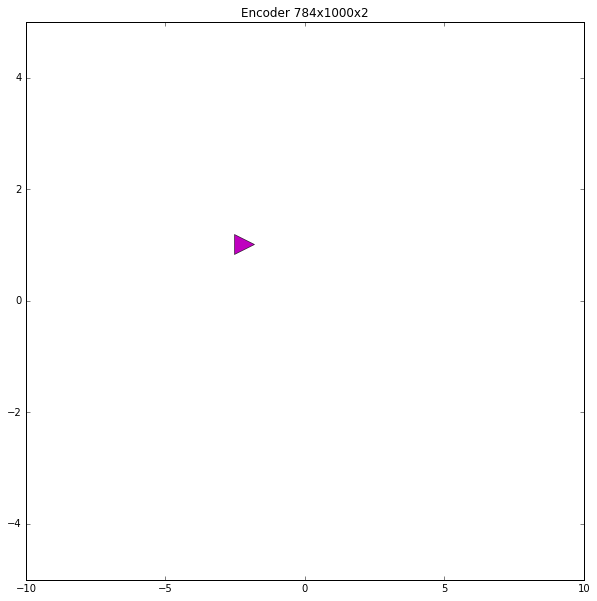

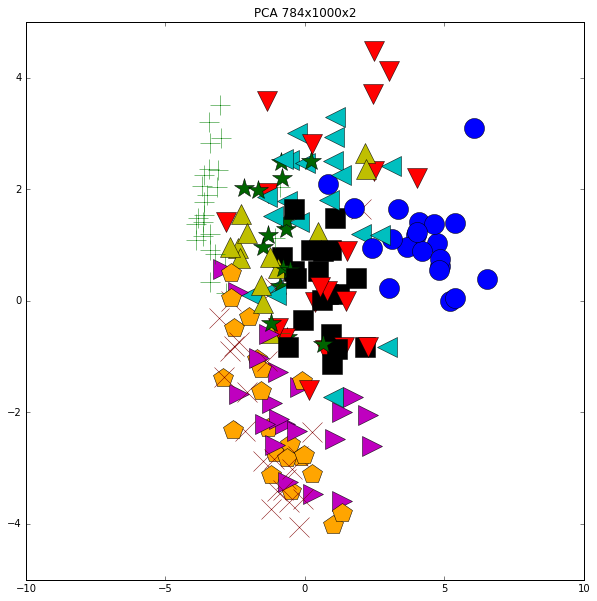

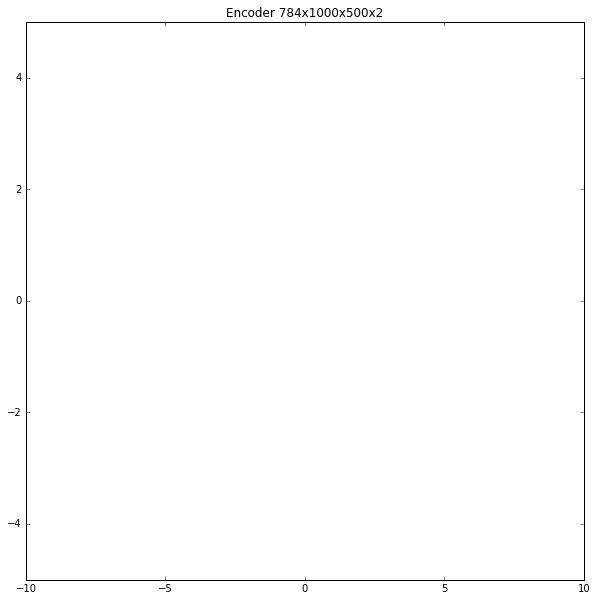

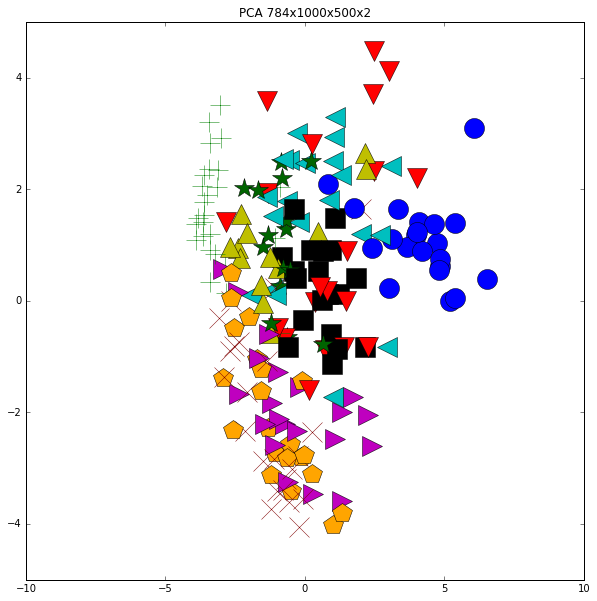

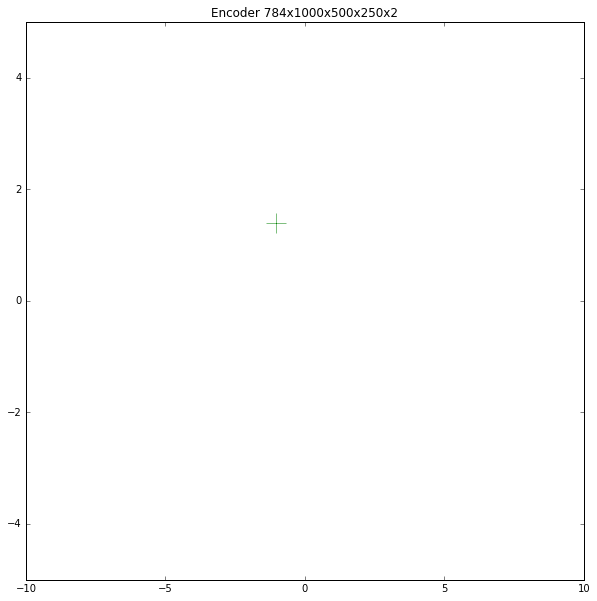

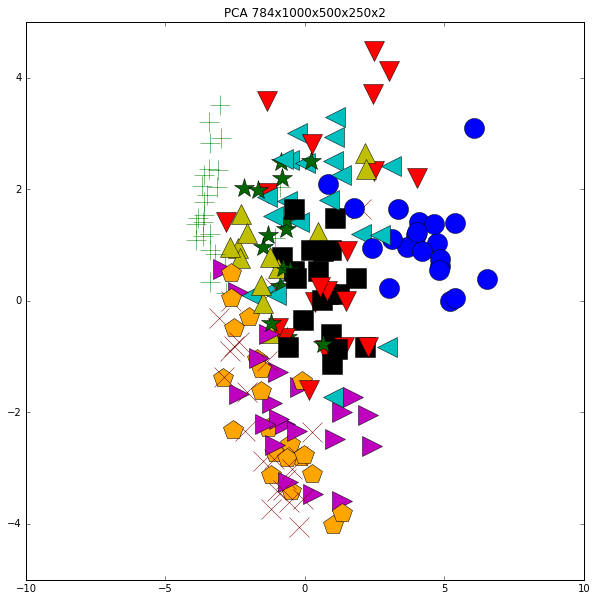

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

nplot = 200

# PCA
pca = PCA(n_components=2)
pca.fit(x_train)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
    
#  'my_encoder_784x1000x2.h5'
encoder = load_model('my_encoder_784x1000x2.h5')
encoded_train = encoder.predict(x_train[:nplot])
pca = PCA(n_components=2)
pca.fit(x_train)

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
plt.figure(figsize=(10, 10))
plt.title("Encoder 784x1000x2")
for idx in xrange(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
    color=colors[label], marker=markers[label], markersize=20)
    pca_train = pca.transform(x_train)
    encoded_train = pca_train[:nplot]
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
plt.show()

# 'my_encoder_784x1000x500x2.h5'

encoder = load_model('my_encoder_784x1000x500x2.h5')
encoded_train = encoder.predict(x_train[:nplot])
pca = PCA(n_components=2)
pca.fit(x_train)

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
plt.figure(figsize=(10, 10))
plt.title("Encoder 784x1000x500x2")
for idx in xrange(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
    color=colors[label], marker=markers[label], markersize=20)
    pca_train = pca.transform(x_train)
    encoded_train = pca_train[:nplot]
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
plt.show()

# 'my_encoder_784x1000x500x250x2.h5'

encoder = load_model('my_encoder_784x1000x500x250x2.h5')
encoded_train = encoder.predict(x_train[:nplot])
pca = PCA(n_components=2)
pca.fit(x_train)

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
plt.figure(figsize=(10, 10))
plt.title("Encoder 784x1000x500x250x2")
for idx in xrange(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
    color=colors[label], marker=markers[label], markersize=20)
    pca_train = pca.transform(x_train)
    encoded_train = pca_train[:nplot]
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
plt.show()

## i) Visualización de Pesos

In [52]:
import matplotlib.cm as cm

def visualize_weights(W):
    plt.figure(figsize=(10, 10))
    for ind, val in enumerate(W.T):
        ax = plt.subplot(4, 5, ind+1)
        im = val.reshape((28,28))
        plt.imshow(im, interpolation='nearest', cmap=cm.binary)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False) 

    plt.show()

AE 784x1000x2


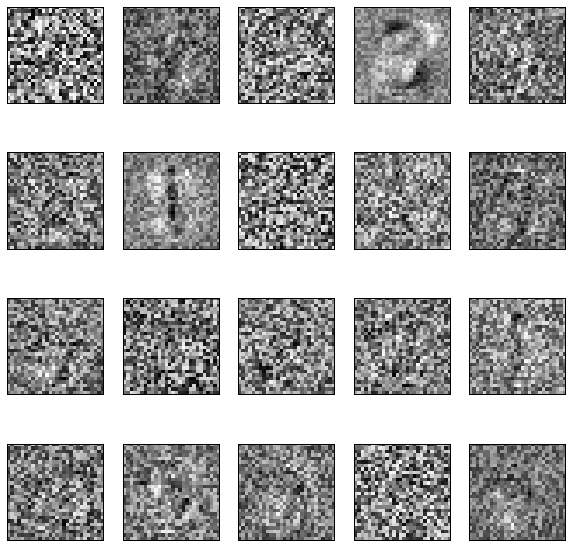

AE 784x1000x500x2


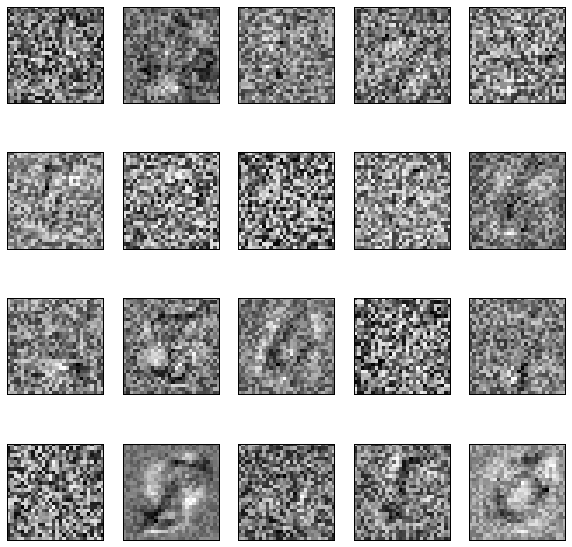

AE 784x1000x500x250x8


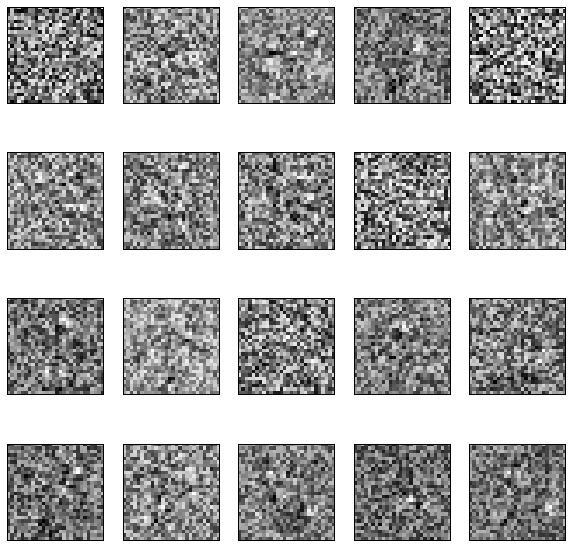

AE 784x1000x500x250x32


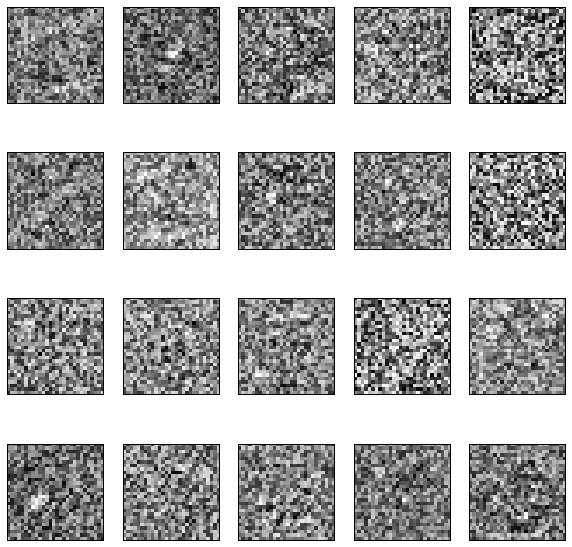

In [54]:
print "AE 784x1000x2"
model = load_model('my_autoencoder_784x1000x2.h5')
W1 = model.get_weights()[0][:,:20]
visualize_weights(W1)

print "AE 784x1000x500x2"
model = load_model('my_autoencoder_784x1000x500x2.h5')
W1 = model.get_weights()[0][:,:20]
visualize_weights(W1)

print "AE 784x1000x500x250x8"
model = load_model('my_autoencoder_784x1000x500x250x8.h5')
W1 = model.get_weights()[0][:,:20]
visualize_weights(W1)

print "AE 784x1000x500x250x32"
model = load_model('my_autoencoder_784x1000x500x250x32.h5')
W1 = model.get_weights()[0][:,:20]
visualize_weights(W1)